In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('insurance500.csv')


In [ ]:
# Calculating word counts using simple string split
df['question_words'] = df['question'].str.split().str.len()
df['answer_words'] = df['answer'].str.split().str.len()
df['total_words'] = df['question_words'] + df['answer_words']

# Basic statistics
word_stats = pd.DataFrame({
    'Questions': df['question_words'].describe(),
    'Answers': df['answer_words'].describe(),
    'Total QA': df['total_words'].describe()
})

print("\nWord Count Statistics:")
print(word_stats)

# Category distribution
print("\nCategory Distribution:")
print(df['category'].value_counts())


Word Count Statistics:
        Questions     Answers    Total QA
count  500.000000  500.000000  500.000000
mean     7.794000   99.330000  107.124000
std      2.872641   99.452112   99.292894
min      3.000000    8.000000   15.000000
25%      6.000000   55.000000   62.000000
50%      7.000000   70.000000   78.500000
75%      9.000000  100.000000  108.000000
max     25.000000  811.000000  819.000000

Category Distribution:
category
Insurance    500
Name: count, dtype: int64


/var/folders/6w/3b5d6y0527b3rqt28d98y2vc0000gn/T/ipykernel_23209/2000707763.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)


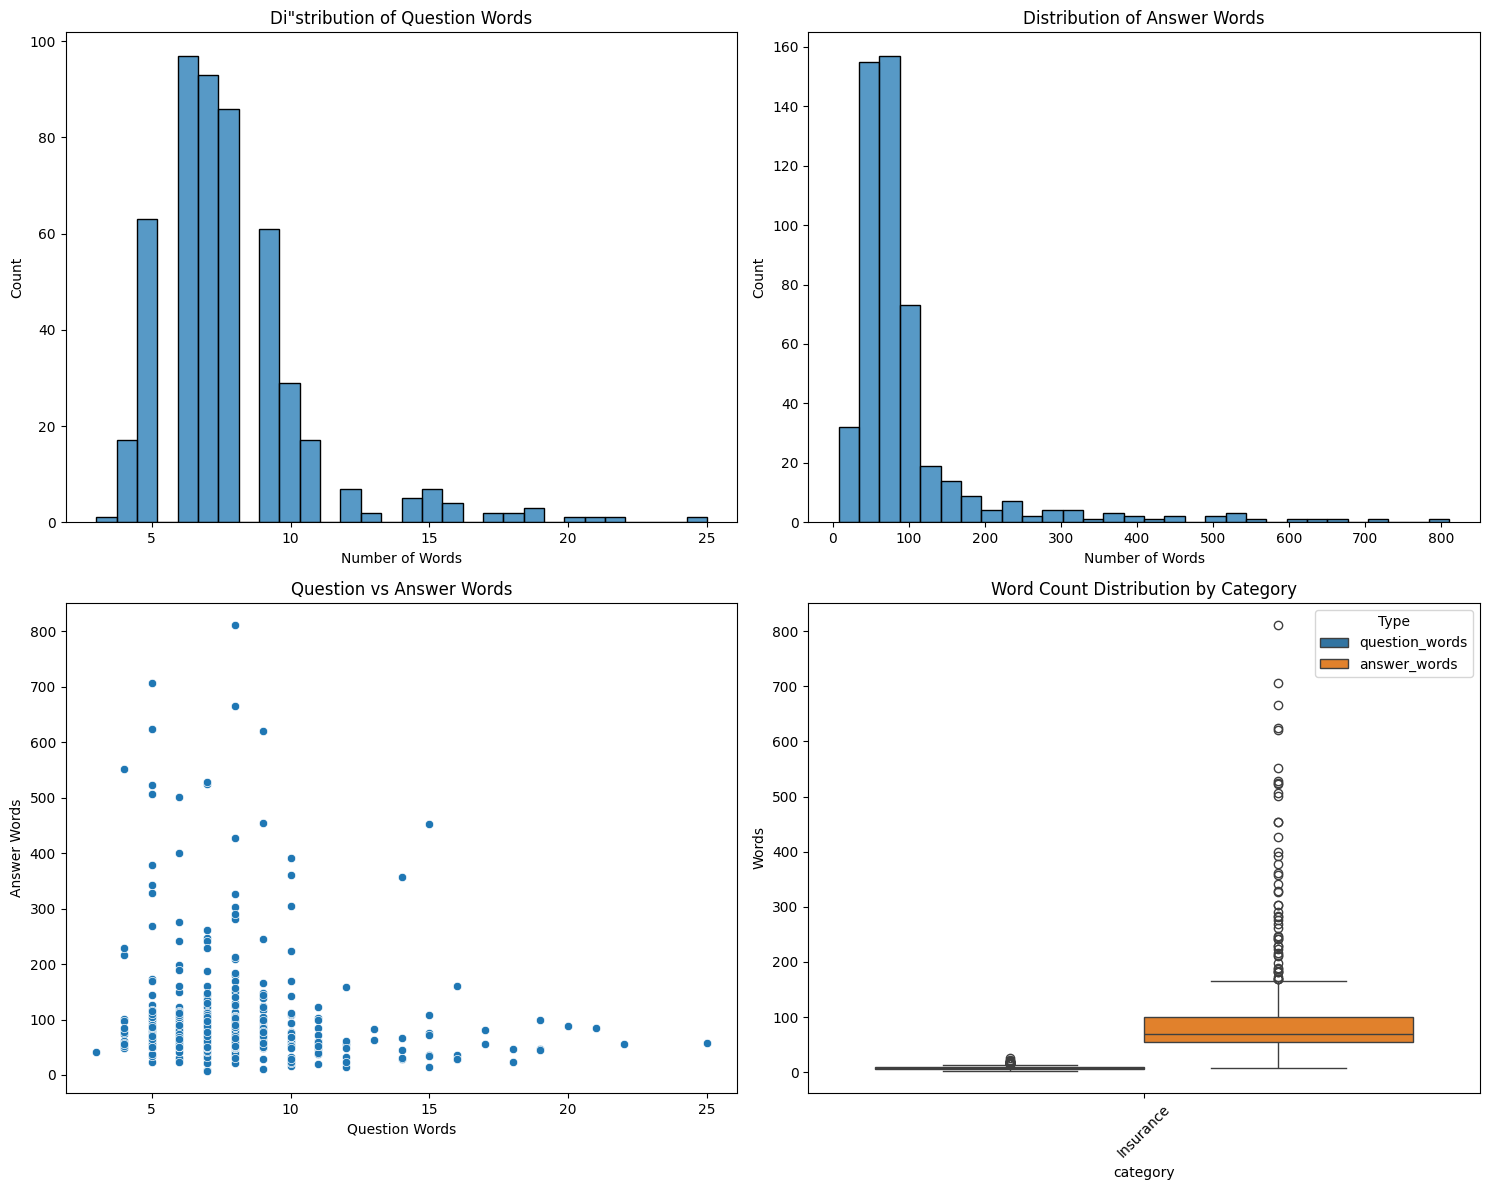

In [17]:
# Create subplots for visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Distribution of question words
sns.histplot(df['question_words'], ax=axes[0,0], bins=30)
axes[0,0].set_title('Di"stribution of Question Words')
axes[0,0].set_xlabel('Number of Words')

# Plot 2: Distribution of answer words
sns.histplot(df['answer_words'], ax=axes[0,1], bins=30)
axes[0,1].set_title('Distribution of Answer Words')
axes[0,1].set_xlabel('Number of Words')

# Plot 3: Question vs Answer words scatter
sns.scatterplot(data=df, x='question_words', y='answer_words', ax=axes[1,0])
axes[1,0].set_title('Question vs Answer Words')
axes[1,0].set_xlabel('Question Words')
axes[1,0].set_ylabel('Answer Words')

# Plot 4: Box plot of words by category
df_melted = pd.melt(df[['category', 'question_words', 'answer_words']], 
                    id_vars=['category'], 
                    value_vars=['question_words', 'answer_words'],
                    var_name='Type', value_name='Words')
sns.boxplot(data=df_melted, x='category', y='Words', hue='Type', ax=axes[1,1])
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
axes[1,1].set_title('Word Count Distribution by Category')

plt.tight_layout()
plt.show()


In [18]:
# Word counts using simple string split
df['question_words'] = df['question'].str.split().str.len()
df['answer_words'] = df['answer'].str.split().str.len()
df['total_words'] = df['question_words'] + df['answer_words']

word_stats = pd.DataFrame({
    'Questions': df['question_words'].describe(),
    'Answers': df['answer_words'].describe(),
    'Total QA': df['total_words'].describe()
})

print("\nWord Count Statistics:")
print(word_stats)

# Distribution
print("\nCategory Distribution:")
print(df['category'].value_counts())


# Correlations
correlation = df['question_words'].corr(df['answer_words'])
print(f"\nCorrelation between question and answer lengths: {correlation:.3f}")

# Average word ratio
avg_ratio = (df['answer_words'] / df['question_words']).mean()
print(f"\nAverage answer/question word ratio: {avg_ratio:.2f}")

# Character length
df['question_chars'] = df['question'].str.len()
df['answer_chars'] = df['answer'].str.len()

print("\nCharacter Length Statistics:")
char_stats = pd.DataFrame({
    'Question_Chars': df['question_chars'].describe(),
    'Answer_Chars': df['answer_chars'].describe()
})
print(char_stats)

# Longest and shortest QA pairs by word count
longest_qa = df.loc[df['total_words'].idxmax()]
shortest_qa = df.loc[df['total_words'].idxmin()]

print("\nShortest Q&A pair:")
print(f"Question ({shortest_qa['question_words']} words): {shortest_qa['question']}")
print(f"Answer ({shortest_qa['answer_words']} words): {shortest_qa['answer']}")

print("\nLongest Q&A pair:")
print(f"Question ({longest_qa['question_words']} words): {longest_qa['question']}")
print(f"Answer ({longest_qa['answer_words']} words): {longest_qa['answer']}")

print("\nAdditional Metrics:")
print(f"Average words per question: {df['question_words'].mean():.1f}")
print(f"Average words per answer: {df['answer_words'].mean():.1f}")
print(f"Average characters per question: {df['question_chars'].mean():.1f}")
print(f"Average characters per answer: {df['answer_chars'].mean():.1f}")
print(f"Median words in questions: {df['question_words'].median():.1f}")
print(f"Median words in answers: {df['answer_words'].median():.1f}")


Word Count Statistics:
        Questions     Answers    Total QA
count  500.000000  500.000000  500.000000
mean     7.794000   99.330000  107.124000
std      2.872641   99.452112   99.292894
min      3.000000    8.000000   15.000000
25%      6.000000   55.000000   62.000000
50%      7.000000   70.000000   78.500000
75%      9.000000  100.000000  108.000000
max     25.000000  811.000000  819.000000

Category Distribution:
category
Insurance    500
Name: count, dtype: int64

Correlation between question and answer lengths: -0.070

Average answer/question word ratio: 14.36

Character Length Statistics:
       Question_Chars  Answer_Chars
count      500.000000    500.000000
mean        50.194000    585.242000
std         15.107244    599.870226
min         16.000000     51.000000
25%         41.000000    327.000000
50%         48.000000    410.000000
75%         56.000000    578.000000
max        134.000000   4955.000000

Shortest Q&A pair:
Question (7 words): Does Term life insurance cov